# **Review of Udemy course - Python for Financial Analysis and Algorithmic Trading**
*All codes and sources are from the course and the instructor of the course has copyrights.

*Used Diseny and Netflix instead of the car companies used in the udemy course

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Getting the Data
*using PANDAS DATAREADER

In [2]:
import pandas_datareader
import datetime
import pandas_datareader.data as web

#*setting start and end data
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2019, 8, 1)
disney = web.DataReader("DIS", 'yahoo', start, end)

In [3]:
disney.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,109.139999,107.730003,108.099998,108.970001,9723500.0,108.299324
2019-01-03,108.650002,105.940002,108.480003,106.330002,10594700.0,105.675568
2019-01-04,110.750000,107.250000,107.940002,109.610001,10122800.0,108.935379
2019-01-07,111.400002,109.300003,109.910004,110.559998,6714700.0,109.879532
2019-01-08,112.559998,111.169998,111.800003,111.419998,8730700.0,110.734238


In [4]:
netflix = web.DataReader("NFLX", 'yahoo', start, end)

In [5]:
netflix.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,269.750000,256.579987,259.279999,267.660004,11679500,267.660004
2019-01-03,275.790009,264.429993,270.200012,271.200012,14969600,271.200012
2019-01-04,297.799988,278.540009,281.880005,297.570007,19330100,297.570007
2019-01-07,316.799988,301.649994,302.100006,315.339996,18620100,315.339996
2019-01-08,320.589996,308.010010,319.980011,320.269989,15359200,320.269989


## EDA

### *Open Price

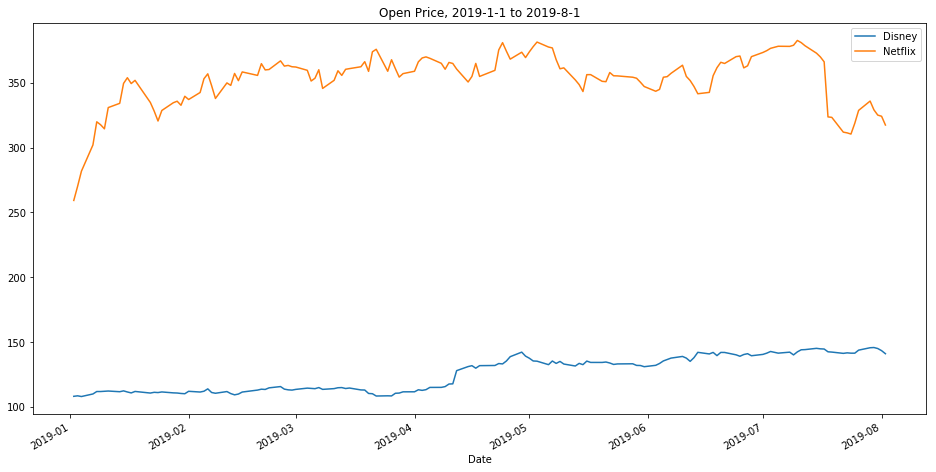

In [6]:
# Open Price
disney['Open'].plot(label='Disney', figsize=(16,8), title = 'Open Price, 2019-1-1 to 2019-8-1')
netflix['Open'].plot(label='Netflix')
plt.legend()

### *Volume

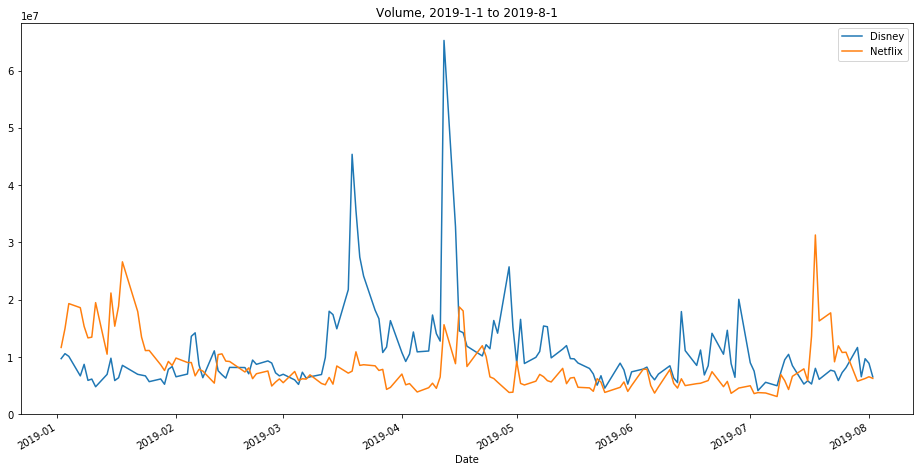

In [7]:
disney['Volume'].plot(label='Disney', figsize=(16,8), title = 'Volume, 2019-1-1 to 2019-8-1')
netflix['Volume'].plot(label='Netflix')
plt.legend()

In [8]:
disney['Volume'].idxmax()
# https://www.cnbc.com/2019/04/12/disney-shares-rocket-higher-after-unveiling-streaming-cheaper-than-netflix.html

Timestamp('2019-04-12 00:00:00')

Article: [Article](https://www.cnbc.com/2019/04/12/disney-shares-rocket-higher-after-unveiling-streaming-cheaper-than-netflix.html)

In [9]:
netflix['Volume'].idxmax()
# https://www.marketwatch.com/story/netflix-stock-drops-more-than-10-as-earnings-show-huge-drop-in-new-subscribers-2019-07-17

Timestamp('2019-07-18 00:00:00')

Article: [Article](https://www.marketwatch.com/story/netflix-stock-drops-more-than-10-as-earnings-show-huge-drop-in-new-subscribers-2019-07-17)

### *Total Traded = Open Price x Volume

In [10]:
disney['Total Traded'] = disney['Open'] * disney['Volume']
netflix['Total Traded'] = netflix['Open'] * netflix['Volume']

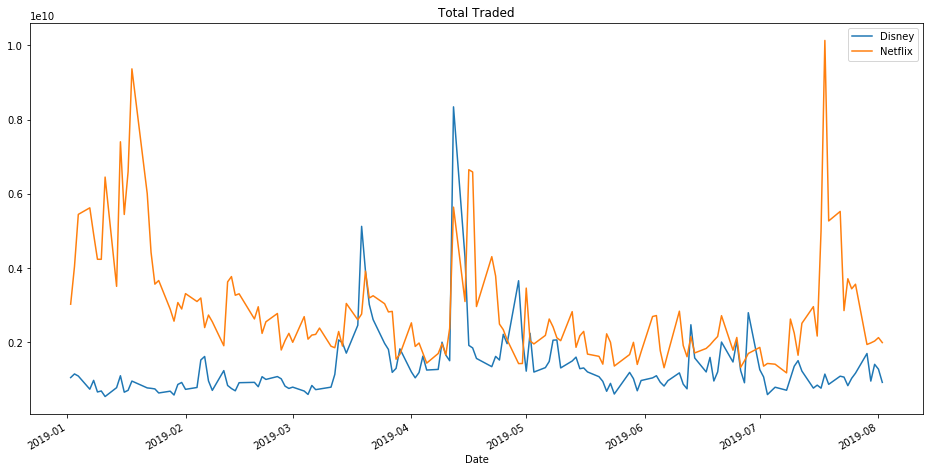

In [11]:
disney['Total Traded'].plot(label = 'Disney', figsize=(16,8), title = 'Total Traded')
netflix['Total Traded'].plot(label ='Netflix')

plt.legend()

In [12]:
### *Simple Moving Average

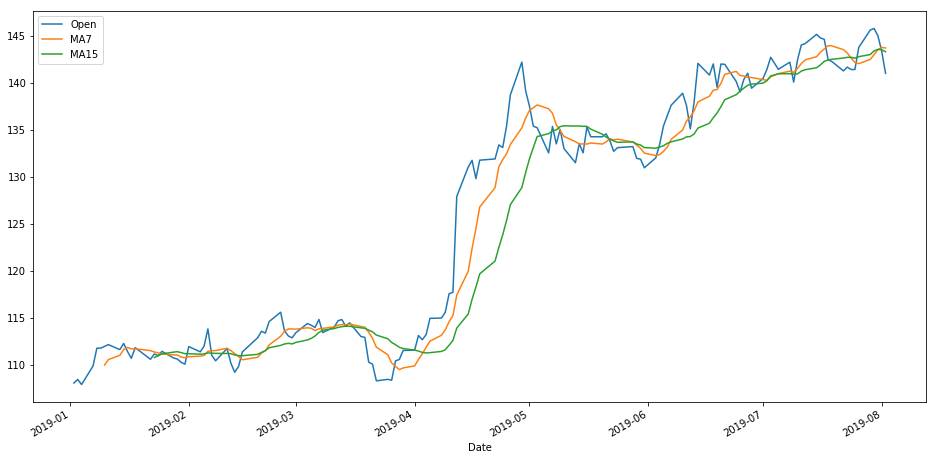

In [13]:
disney['Open'].plot(label='Open',figsize=(16,8))
disney.rolling(window=7).mean()['Open'].plot(label='MA7')
disney.rolling(window=15).mean()['Open'].plot(label='MA15')
plt.legend()

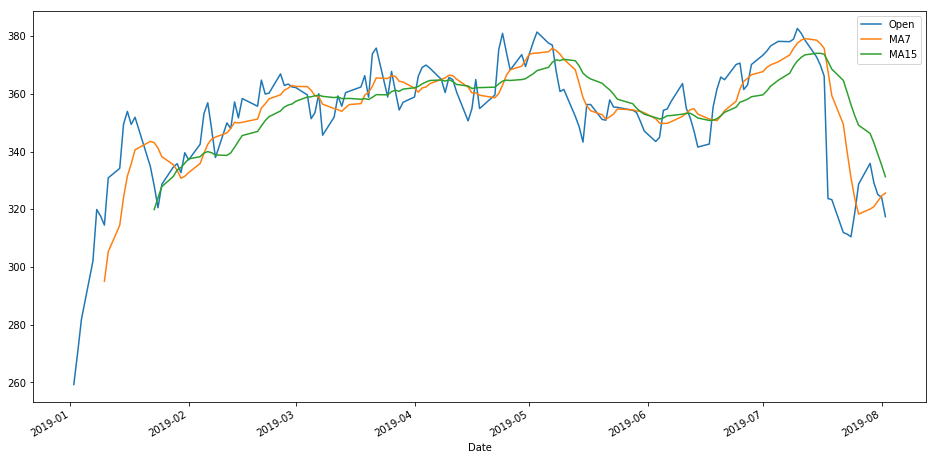

In [14]:
netflix['Open'].plot(label='Open',figsize=(16,8))
netflix.rolling(window=7).mean()['Open'].plot(label='MA7')
netflix.rolling(window=15).mean()['Open'].plot(label='MA15')
plt.legend()

### *Scatter Plot

In [15]:
from pandas.plotting import scatter_matrix
media_comp = pd.concat([disney['Open'], netflix['Open']], axis=1)
media_comp.head()

,Open,Open
Date,,
2019-01-02,108.099998,259.279999
2019-01-03,108.480003,270.200012
2019-01-04,107.940002,281.880005
2019-01-07,109.910004,302.100006
2019-01-08,111.800003,319.980011


In [16]:
media_comp.columns = ['Disney Open', 'Netflix Open']
media_comp.head()

,Disney Open,Netflix Open
Date,,
2019-01-02,108.099998,259.279999
2019-01-03,108.480003,270.200012
2019-01-04,107.940002,281.880005
2019-01-07,109.910004,302.100006
2019-01-08,111.800003,319.980011


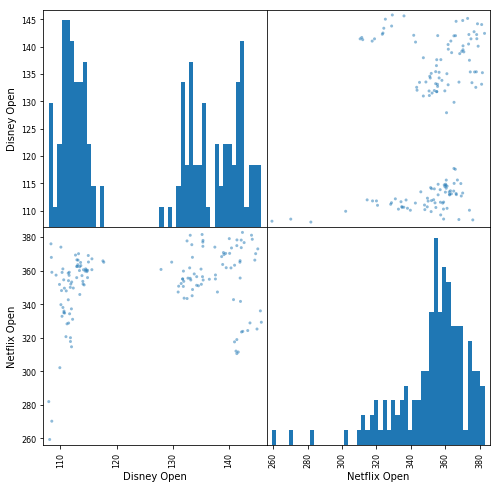

In [17]:
scatter_matrix(media_comp,figsize=(8,8),hist_kwds={'bins':50});